In [13]:
pip install tensorflow.keras

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
#library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
import category_encoders as ce
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Dense, Concatenate
import tensorflow as tf

from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier,MLPRegressor

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv("C:/Projet/Salary prediction/Dataset/Dataset salary 2024.csv")

In [3]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,202730,USD,202730,US,0,US,M
1,2024,SE,FT,AI Engineer,92118,USD,92118,US,0,US,M
2,2024,SE,FT,Data Engineer,130500,USD,130500,US,0,US,M
3,2024,SE,FT,Data Engineer,96000,USD,96000,US,0,US,M
4,2024,SE,FT,Machine Learning Engineer,190000,USD,190000,US,0,US,M


In [4]:
#Prelimary Analysis
#df[[df["job_title"].value_counts()>1]==False]["job_title"]
#df["job_title"].value_counts()[df["job_title"].value_counts()<10]
df["employment_type"].value_counts()#.unique()

employment_type
FT    16454
PT       38
CT       28
FL       14
Name: count, dtype: int64

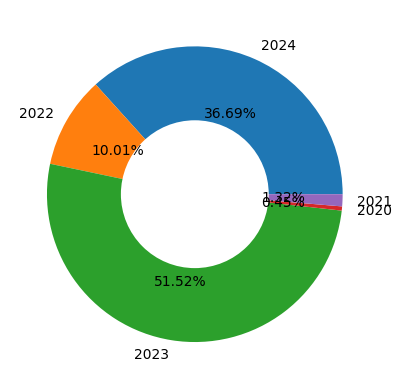

In [5]:
#Count of the amount of salary available per year 

salary_per_year = []
year_salary = []

for i in df["work_year"].unique():
    salary_per_year.append(len(df[df["work_year"]==i]))
    year_salary.append(i)
plt.pie(x=salary_per_year, labels=year_salary , autopct="%.2f%%")
centre_circle = plt.Circle((0,0), 0.50, fc='white')
fig = plt.gcf()
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

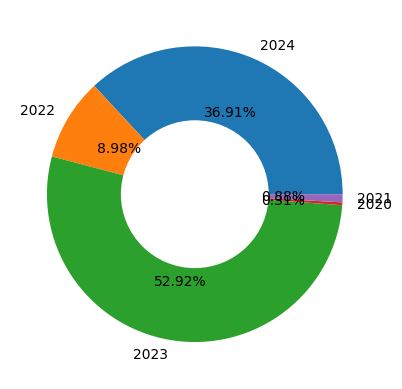

In [10]:
#Sum of the salary per year 

salary_per_year = []
year_salary = []

#creation of the Pie chart
for i in df["work_year"].unique():
    salary_per_year.append(sum(df[df["work_year"]==i]["salary_in_usd"]))
    year_salary.append(i)
plt.pie(x=salary_per_year, labels=year_salary , autopct="%.2f%%")
centre_circle = plt.Circle((0,0), 0.50, fc='white')
fig = plt.gcf()
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

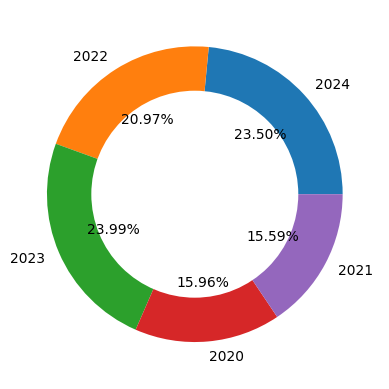

In [24]:
#Average salary per year 

salary_avg_year = []
year_salary = []

#creation of the Pie chart
for i in df["work_year"].unique():
    salary_avg_year.append(sum(df[df["work_year"]==i]["salary_in_usd"])/len(df[df["work_year"]==i]))
    year_salary.append(i)
plt.pie(x=salary_avg_year, labels=year_salary , autopct="%.2f%%")
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

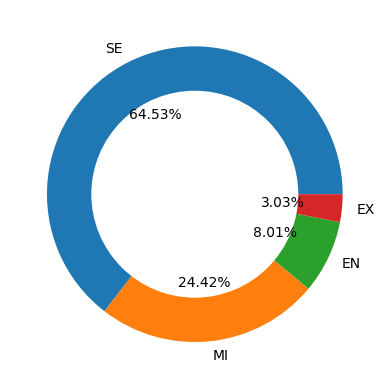

In [12]:
# Analysis on the experience level

avg_exp = []
exp_title = []

#creation of the Pie chart
for i in df["experience_level"].unique():
    avg_exp.append(len(df[df["experience_level"]==i]))
    exp_title.append(i)
plt.pie(x=avg_exp, labels=exp_title , autopct="%.2f%%")
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

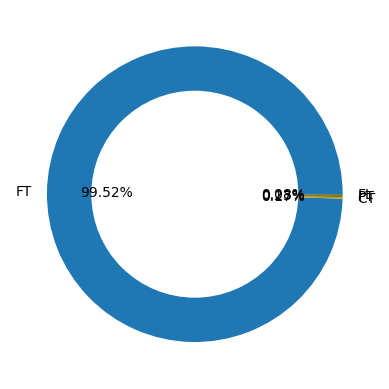

In [13]:
# Analysis on the employment type

avg_emp = []
emp_title = []

#creation of the Pie chart
for i in df["employment_type"].unique():
    avg_emp.append(len(df[df["employment_type"]==i]))
    emp_title.append(i)
plt.pie(x=avg_emp, labels=emp_title , autopct="%.2f%%")
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

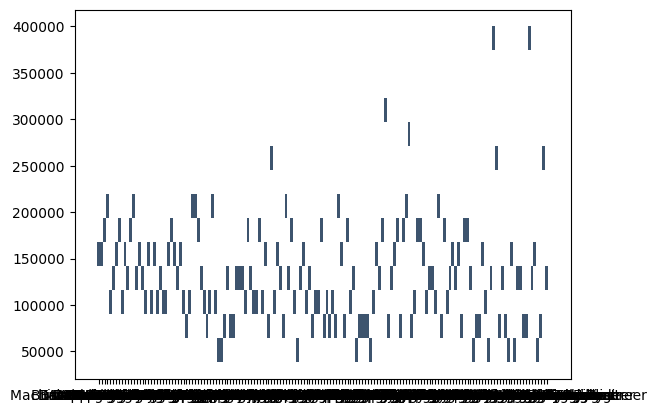

,AVG_Salary
Analytics Engineering Manager,399880.000000
Data Science Tech Lead,375000.000000
Head of Machine Learning,299758.428571
Managing Director Data Science,280000.000000
AWS Data Architect,258000.000000
AI Architect,252551.241379
Cloud Data Architect,250000.000000
Director of Data Science,218775.333333
Head of Data,211860.196721
Prompt Engineer,205093.588235


In [17]:
#best way to visualize the this is to split the different salary position in range and plot them one after another 
salary_avg_job = []
job_title = []

for i in df["job_title"].unique():
    salary_avg_job.append(sum(df[df["job_title"]==i]["salary_in_usd"])/len(df[df["job_title"]==i]))
    job_title.append(i)

salary_avg_Dataframe=pd.DataFrame(salary_avg_job,index=job_title,columns=["AVG_Salary"]).sort_values("AVG_Salary",ascending = False)
#fig, ax = plt.subplots(figsize=(100, 100))
i=-1
ax = sns.histplot(x=job_title[:i], y=salary_avg_job[:i],legend=True)
#plt.legend(title='Job Title', loc='lower right', labels=job_title)
plt.show()
salary_avg_Dataframe.head(20)

In [21]:
df.groupby(["job_title"]).size().sort_values(ascending = True)

job_title
Staff Machine Learning Engineer       1
Marketing Data Engineer               1
Marketing Data Scientist              1
Power BI Developer                    1
Data Analytics Associate              1
                                   ... 
Research Scientist                  531
Machine Learning Engineer          1705
Data Analyst                       2440
Data Scientist                     3314
Data Engineer                      3464
Length: 155, dtype: int64

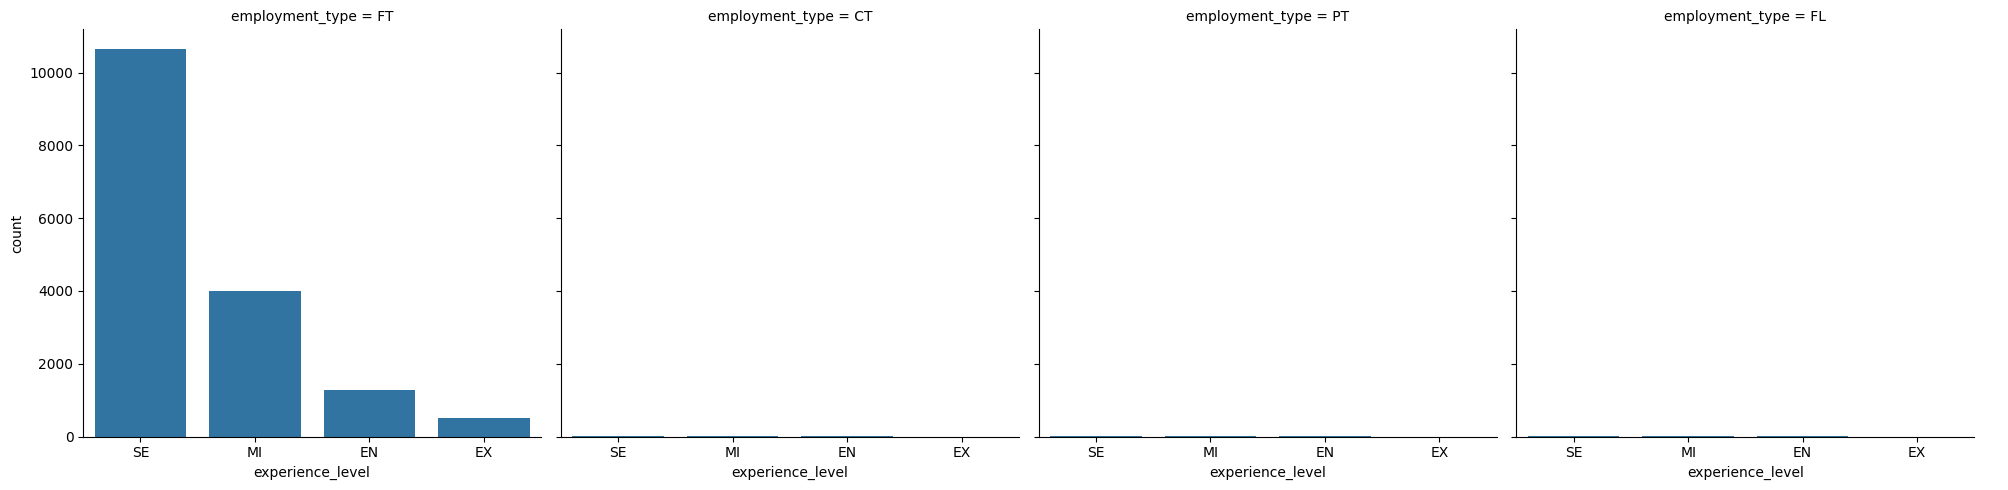

In [14]:
ax = sns.catplot(data=df, x='experience_level', col='employment_type', kind='count')

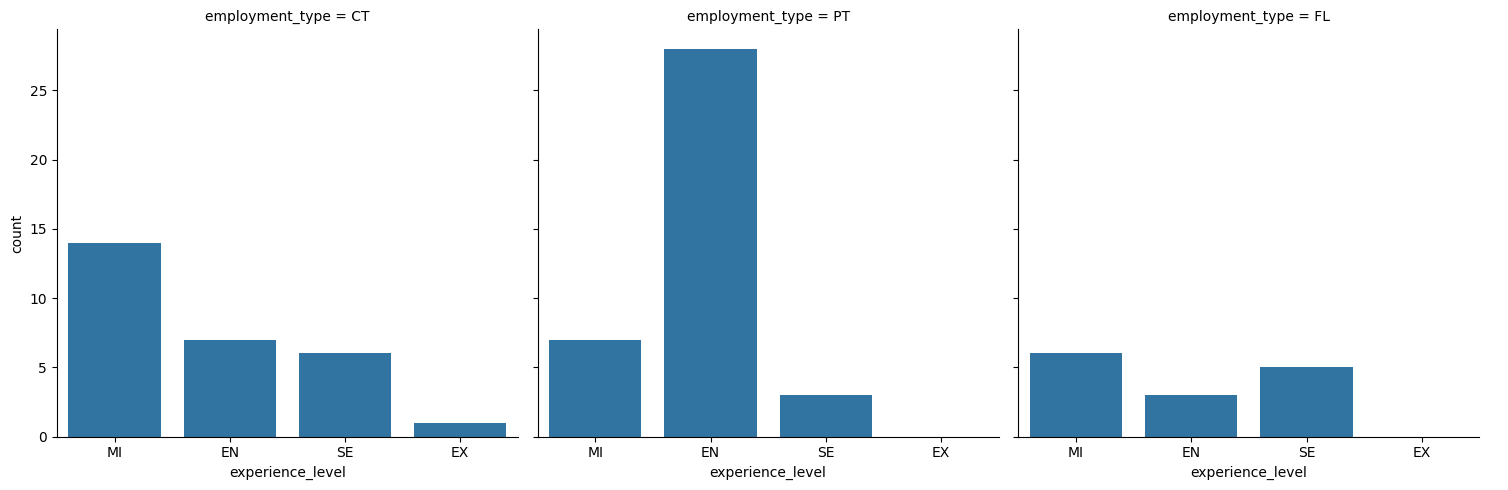

In [22]:
ax = sns.catplot(data=df[df["employment_type"]!="FT"], x='experience_level', col='employment_type', kind='count')

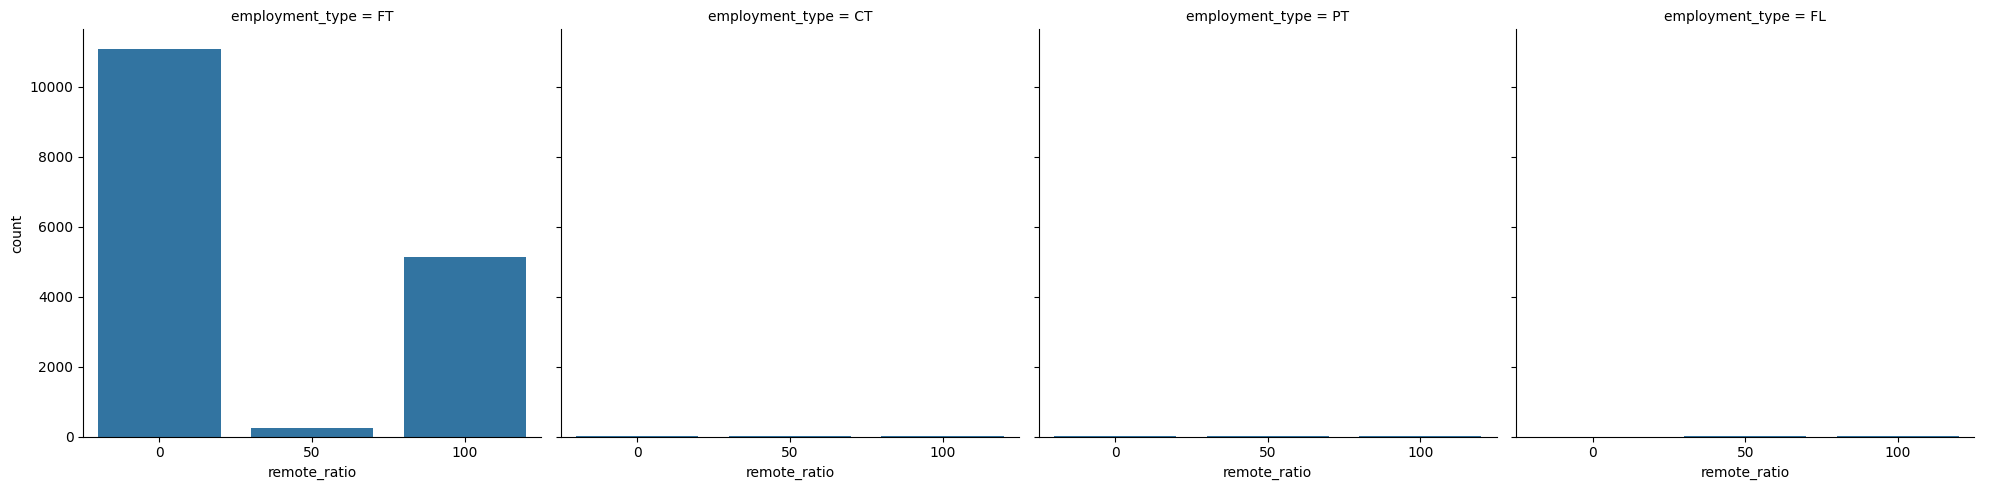

In [23]:
ax = sns.catplot(data=df, x='remote_ratio', col='employment_type', kind='count')

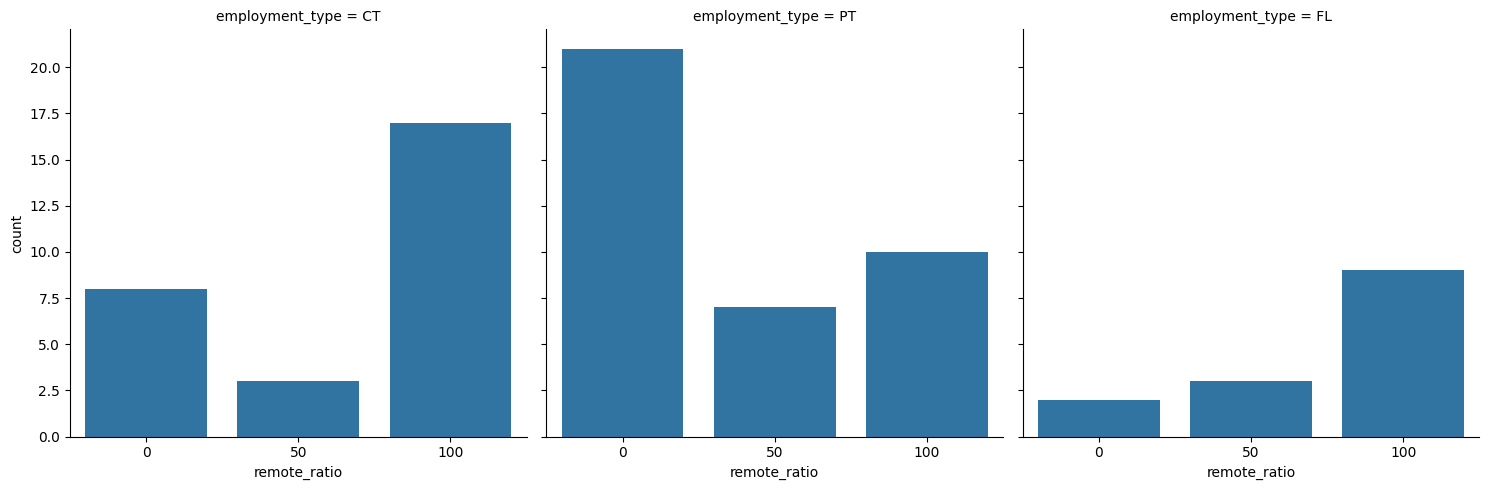

In [17]:
ax = sns.catplot(data=df[df["employment_type"]!="FT"], x='remote_ratio', col='employment_type', kind='count')

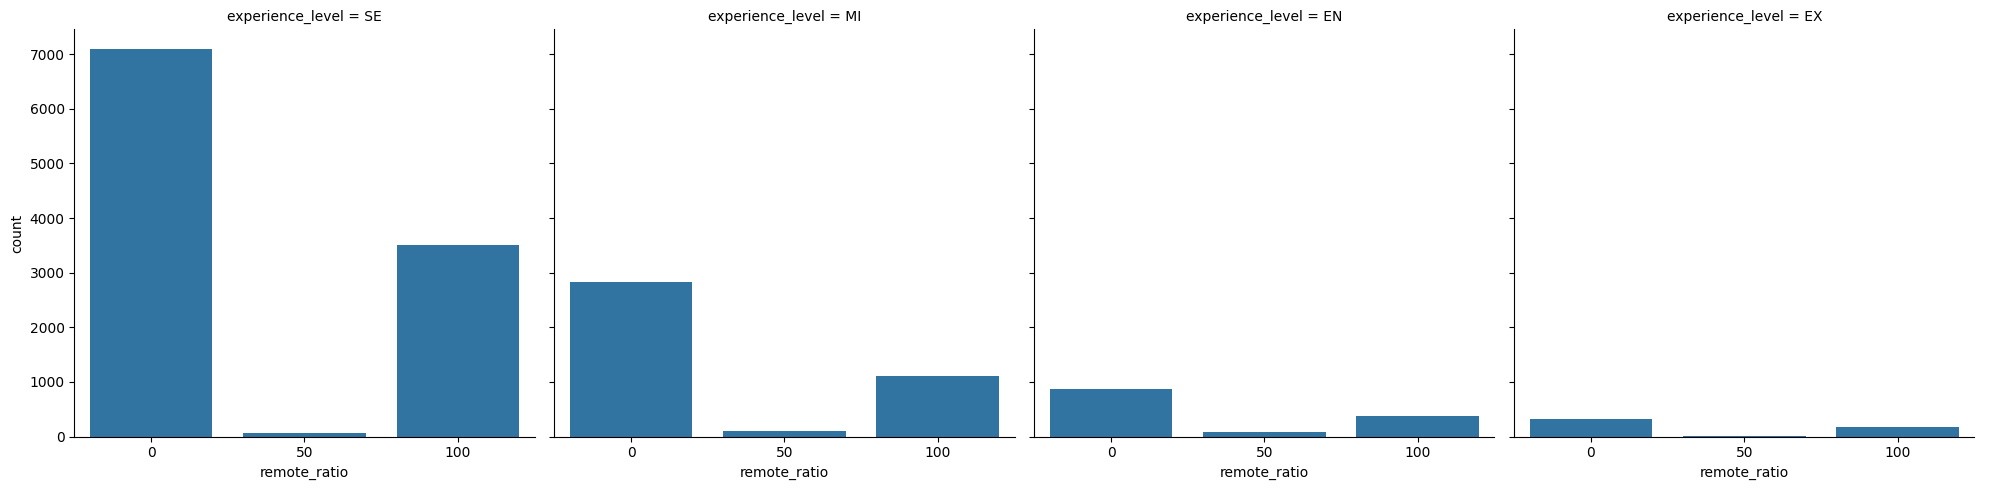

In [19]:
ax = sns.catplot(data=df, x='remote_ratio', col='experience_level', kind='count')#,color="green")

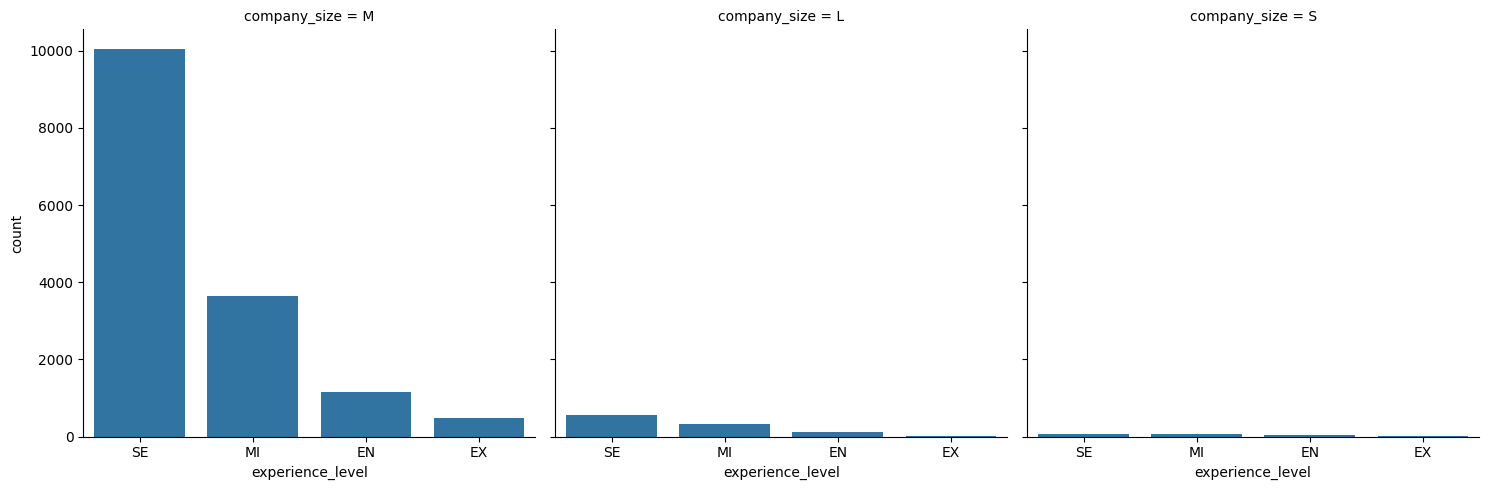

In [29]:
ax = sns.catplot(data=df, x="experience_level", col='company_size', kind='count')

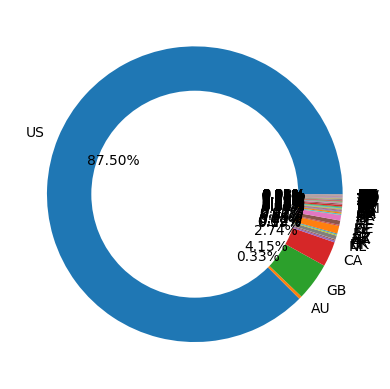

In [10]:
avg_emp = []
emp_title = []

for i in df["employee_residence"].unique():
    avg_emp.append(len(df[df["employee_residence"]==i]))
    emp_title.append(i)
plt.pie(x=avg_emp, labels=emp_title , autopct="%.2f%%")
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

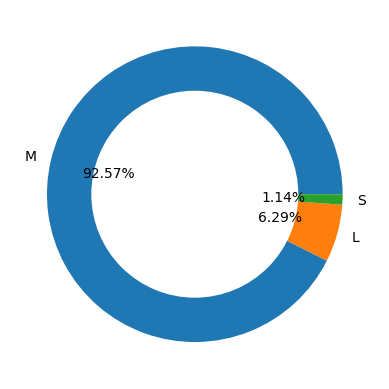

In [11]:
avg_emp = []
emp_title = [] 

for i in df["company_size"].unique():
    avg_emp.append(len(df[df["company_size"]==i]))
    emp_title.append(i)
plt.pie(x=avg_emp, labels=emp_title , autopct="%.2f%%")
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

In [3]:
# Potential Correlation between the compagny location and employee residence 

pd.crosstab(index=df["company_location"], columns = df["employee_residence"])

employee_residence,AD,AE,AM,AR,AS,AT,AU,BA,BE,BG,...,SI,TH,TN,TR,UA,UG,US,UZ,VN,ZA
company_location,,,,,,,,,,,,,,,,,,,,,
AD,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AE,0,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AM,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AR,0,0,0,9,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TR,0,0,0,0,0,0,0,0,0,0,...,0,0,0,6,0,0,0,0,0,0
UA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,10,0,0,0,0,0
US,0,0,0,3,0,0,0,0,2,1,...,0,1,1,1,0,1,14461,2,1,0


In [29]:
# encode: employment_type,employee_residence,company_location
# one_hot_encoding: experience_level,company_size
# another method to find: job_title
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,202730,USD,202730,US,0,US,M
1,2024,SE,FT,AI Engineer,92118,USD,92118,US,0,US,M
2,2024,SE,FT,Data Engineer,130500,USD,130500,US,0,US,M
3,2024,SE,FT,Data Engineer,96000,USD,96000,US,0,US,M
4,2024,SE,FT,Machine Learning Engineer,190000,USD,190000,US,0,US,M


In [52]:
X_val = df.drop(["salary_in_usd","salary","salary_currency"],axis=1)
y_val = df["salary_in_usd"]
X_train, X_test,y_train,y_test = train_test_split(X_val,
                                                y_val,
                                                test_size = 0.3,
                                                random_state = 42)

In [53]:
df_prepro = pd.concat([X_train,y_train],axis=1)

In [74]:
X_train.pop('experience_level')

14159    MI
4339     MI
8293     SE
9320     MI
6494     SE
         ..
11284    SE
11964    SE
5390     SE
860      SE
15795    SE
Name: experience_level, Length: 11573, dtype: object

## Preprocessing Steps

In [54]:
# Categorical Preprocessing

#Part 1: Label Encoding
cat_col=["employment_type","employee_residence","company_location"]
encoder = ce.OrdinalEncoder(cols=cat_col)
df_encoded = encoder.fit_transform(df_prepro)


In [56]:
#Part 2: OneHotEncoder
cat_col2 = ["experience_level","company_size"]
main_cat = tuple(i for i in df_prepro.columns if i not in cat_col2)

#creation of the pipeline
preprocessor = ColumnTransformer(
    transformers = [ ('onehot', OneHotEncoder(), cat_col2)], remainder = 'passthrough'
)
df_hot = preprocessor.fit_transform (df_encoded)

#creation of the new features and combination with the original dataset
one_hot_encoder = preprocessor.named_transformers_['onehot'] 
encoded_feature_names = one_hot_encoder.get_feature_names_out(cat_col2)
all_features = list(encoded_feature_names) + list(main_cat)
df_hot_encoded = pd.DataFrame(df_hot, columns = all_features)



In [57]:
df_hot_encoded

,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,company_size_L,company_size_M,company_size_S,work_year,employment_type,job_title,employee_residence,remote_ratio,company_location,salary_in_usd
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2023,1,Data Scientist,1,100,1,151410
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2024,1,Data Scientist,1,0,1,111600
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2023,1,Data Engineer,1,0,1,130000
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2023,1,Data Analyst,1,0,1,78000
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2023,1,Data Scientist,1,0,1,132500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11568,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2023,1,Machine Learning Engineer,1,0,1,119250
11569,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2023,1,Data Scientist,1,100,1,161000
11570,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2024,1,Data Science,1,0,1,179000
11571,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2024,1,Data Architect,1,100,1,144000


In [5]:
df_copy = df_hot_encoded.copy()

In [7]:
len(df_copy["job_title"].unique())

155

In [58]:
from sklearn.preprocessing import LabelEncoder

job_title_encoder = LabelEncoder()
df_hot_encoded["job_title"] = job_title_encoder.fit_transform(df_hot_encoded["job_title"])

#deep learning input

main_input = Input(shape = (1,), name="main_input")

main_embedding = Embedding(input_dim = 155, output_dim = 155, name = "main_embedding")(main_input)
main_flatten = Flatten()(main_embedding)

dense1 = Dense(32, activation = 'relu')(main_flatten)
output = Dense(1, activation = "linear")(dense1)

model = Model(inputs = [main_input], outputs = output)

model.compile(optimizer = 'adam', loss = 'mse')

model.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ main_input (InputLayer)              │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ main_embedding (Embedding)           │ (None, 1, 155)              │          24,025 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 155)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           4,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,050 (113.48 KB)

 Trainable params: 29,050 (113.48 KB)

 Non-trainable params: 0 (0.00 B)

In [60]:
#X_job = tf.convert_to_tensor(df_copy["job_title"].values)
#y_salary = tf.convert_to_tensor(df_copy["salary"].values)
X_job = df_hot_encoded["job_title"].values
y_salary = df_hot_encoded["salary_in_usd"].values.astype(int)
history = model.fit(X_job,y_salary, epochs = 30, batch_size = 32, validation_split = 0.2)


Epoch 1/30
290/290 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 26885165056.0000 - val_loss: 27551240192.0000
Epoch 2/30
290/290 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 26881044480.0000 - val_loss: 25741733888.0000
Epoch 3/30
290/290 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 24087994368.0000 - val_loss: 21736650752.0000
Epoch 4/30
290/290 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19572805632.0000 - val_loss: 16591903744.0000
Epoch 5/30
290/290 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 14978099200.0000 - val_loss: 12341448704.0000
Epoch 6/30
290/290 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 11211955200.0000 - val_loss: 9978546176.0000
Epoch 7/30
290/290 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9402103808.0000 - val_loss: 8804393984.0000
Epoch 8/30
290/290 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8265679872.0000 - val_loss: 8069937152.0000
Epoch 9/30
290/290 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7612195840.0000 - val_loss: 7497665536.0000
Epoch 10/30
290/290 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

In [61]:
job_embedding_layer = model.get_layer('main_embedding')
job_embedding = job_embedding_layer.get_weights()[0]

job_embed_df = pd.DataFrame(job_embedding)
#job_embed_df['job'] = job_title_encoder.classes_
#df_hot_encoded["job_title"] = job_title_encoder.transform(df_hot_encoded["job_title"])
df_temp = pd.DataFrame(job_embedding[df_hot_encoded["job_title"].values])
for i in range(len(df_temp.columns)):
    df_temp.rename(columns={df_temp.columns[i]:f'job_title_{i+1}'},inplace=True)
df_final= pd.concat([df_hot_encoded,df_temp],axis = 1)
df_final.drop(['job_title'], axis = 1, inplace = True)
df_final#.head()

,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,company_size_L,company_size_M,company_size_S,work_year,employment_type,employee_residence,...,job_title_146,job_title_147,job_title_148,job_title_149,job_title_150,job_title_151,job_title_152,job_title_153,job_title_154,job_title_155
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2023,1,1,...,3.606656,-3.598346,-3.521765,-3.497861,3.568545,3.528126,-3.575029,-3.594337,-3.489290,3.542727
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2024,1,1,...,3.606656,-3.598346,-3.521765,-3.497861,3.568545,3.528126,-3.575029,-3.594337,-3.489290,3.542727
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2023,1,1,...,3.321659,-3.322313,-3.265124,-3.264206,3.338382,3.357450,-3.318268,-3.335396,-3.239458,3.334116
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2023,1,1,...,2.397694,-2.541550,-2.447222,-2.485653,2.493701,2.500223,-2.444398,-2.408550,-2.472372,2.438972
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2023,1,1,...,3.606656,-3.598346,-3.521765,-3.497861,3.568545,3.528126,-3.575029,-3.594337,-3.489290,3.542727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11568,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2023,1,1,...,4.346799,-4.354958,-4.358454,-4.409976,4.349270,4.354198,-4.394320,-4.329494,-4.309318,4.343711
11569,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2023,1,1,...,3.606656,-3.598346,-3.521765,-3.497861,3.568545,3.528126,-3.575029,-3.594337,-3.489290,3.542727
11570,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2024,1,1,...,3.686918,-3.768676,-3.675558,-3.750224,3.774352,3.760114,-3.703691,-3.774642,-3.742859,3.745536
11571,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2024,1,1,...,3.760878,-3.773419,-3.732589,-3.758160,3.832371,3.734963,-3.727878,-3.793181,-3.743882,3.766729


In [22]:
 job_title_encoder.classes_

array(['AI Architect', 'AI Developer', 'AI Engineer',
       'AI Product Manager', 'AI Programmer', 'AI Research Engineer',
       'AI Research Scientist', 'AI Scientist', 'AI Software Engineer',
       'AWS Data Architect', 'Admin & Data Analyst', 'Analytics Engineer',
       'Analytics Engineering Manager', 'Applied Data Scientist',
       'Applied Machine Learning Engineer',
       'Applied Machine Learning Scientist', 'Applied Research Scientist',
       'Applied Scientist', 'Autonomous Vehicle Technician',
       'Azure Data Engineer', 'BI Analyst', 'BI Data Analyst',
       'BI Data Engineer', 'BI Developer', 'Bear Robotics',
       'Big Data Architect', 'Big Data Developer', 'Big Data Engineer',
       'Business Data Analyst', 'Business Intelligence',
       'Business Intelligence Analyst',
       'Business Intelligence Data Analyst',
       'Business Intelligence Developer',
       'Business Intelligence Engineer', 'Business Intelligence Lead',
       'Business Intelligence Man

### Preprocessing of the Testing Data

In [71]:
df_prepro_test = pd.concat([X_test,y_test],axis=1)
df_encoded_test = encoder.transform(df_prepro_test)
df_hot_test = preprocessor.transform (df_encoded_test)

#creation of the new features and combination with the original dataset
one_hot_encoder = preprocessor.named_transformers_['onehot'] 
encoded_feature_names = one_hot_encoder.get_feature_names_out(cat_col2)

job_title_encoder
all_features = list(encoded_feature_names) + list(main_cat)
df_hot_encoded_test = pd.DataFrame(df_hot_test, columns = all_features)



,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,company_size_L,company_size_M,company_size_S,work_year,employment_type,job_title,employee_residence,remote_ratio,company_location,salary_in_usd
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2023,1,Data Analyst,1.0,0,1.0,152380
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2023,1,Data Engineer,1.0,100,1.0,150000
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2024,1,Data Specialist,2.0,0,2.0,51772
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2023,1,Data Analyst,1.0,0,1.0,138900
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2024,1,Data Scientist,1.0,0,1.0,237600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4956,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2024,1,Data Operations Manager,4.0,100,4.0,80000
4957,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2023,1,Machine Learning Engineer,1.0,0,1.0,289076
4958,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2023,1,Data Analyst,1.0,0,1.0,176000
4959,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2023,1,Data Analyst,1.0,0,1.0,105000


In [73]:
job_embedding_layer = model.get_layer('main_embedding')
job_embedding = job_embedding_layer.get_weights()[0]

job_embed_df = pd.DataFrame(job_embedding)
#job_embed_df['job'] = job_title_encoder.classes_
df_hot_encoded_test["job_title"] = job_title_encoder.transform(df_hot_encoded_test["job_title"])
df_temp = pd.DataFrame(job_embedding[df_hot_encoded_test["job_title"].values])
for i in range(len(df_temp.columns)):
    df_temp.rename(columns={df_temp.columns[i]:f'job_title_{i+1}'},inplace=True)
df_final_test= pd.concat([df_hot_encoded_test,df_temp],axis = 1)
df_final_test.drop(['job_title'], axis = 1, inplace = True)
df_final_test#.head()

ValueError: y contains previously unseen labels: 'CRM Data Analyst'

### Model Implementation

In [34]:
model.predict(np.array([1 ))
#type(df_copy["job_title"].values)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


array([[31390.342]], dtype=float32)

In [62]:
df_final.columns[:15]

Index(['experience_level_EN', 'experience_level_EX', 'experience_level_MI',
       'experience_level_SE', 'company_size_L', 'company_size_M',
       'company_size_S', 'work_year', 'employment_type', 'employee_residence',
       'remote_ratio', 'company_location', 'salary_in_usd', 'job_title_1',
       'job_title_2'],
      dtype='object')

### Visualization Section

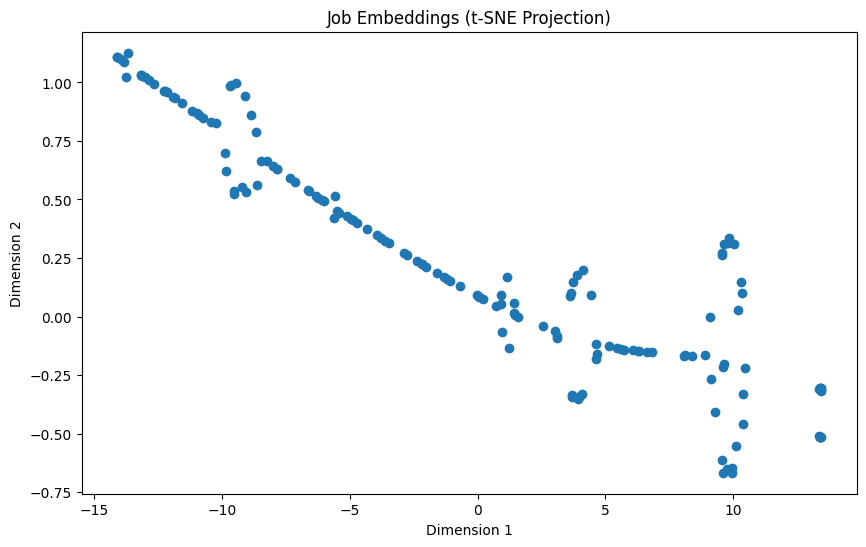

In [16]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Reduce dimensionality of user embeddings to 2D
tsne = TSNE(n_components=2, random_state=42)
job_embeddings_2d = tsne.fit_transform(job_embedding)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(job_embeddings_2d[:, 0], job_embeddings_2d[:, 1])
plt.title('Job Embeddings (t-SNE Projection)')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()